In [558]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re
import copy

In [559]:
data = pd.read_csv('final_till_01_03.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,roles,companies,locations,experience,skills
0,0,0,0,Data Scientist - Lead / Architect - Looking Fo...,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'Data Science', 'SAS', 'Python', 'IT Skills', ..."
1,1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'IT Skills', 'Python', 'Machine Learning', 'NL..."
2,2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'Artificial Intelligence', 'Data Science', 'Da..."
3,3,3,3,Data Analyst / Data Scientist / Business Analy...,GABA Consultancy services,"'Noida', ' New Delhi', 'Delhi'",0-0,"'O2C', 'fresher data analyst', 'Power Bi', 'Ba..."
4,4,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'IT Skills', 'Python', 'Software Development',..."


In [560]:
for i in range(len(data)):
    k = str(data.loc[i,'roles'])
    l = re.sub('- Looking For Early Joiners -','',k)
    data.loc[i,'roles'] = l


<AxesSubplot:>

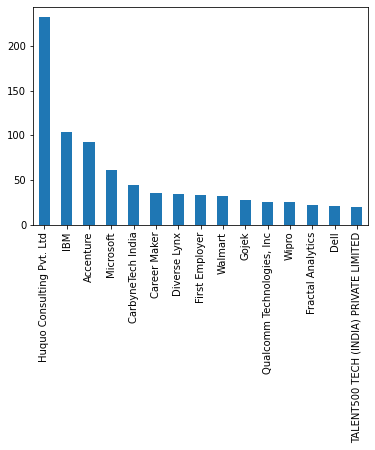

In [563]:
o = data['companies'].value_counts()
o[:15].plot.bar()

In [565]:
print(data.loc[1,'locations'].split(','))

["'Noida'", " 'Delhi'"]


In [566]:
comp_dict = {}
for i in range(len(data)):
    locat = data.loc[i,'locations'].split(',')

    compan = str(data.loc[i,'companies'])
    for k in range(len(locat)):
        if k == 0:
            locat[k] = locat[k][1:-1]
        else:
            locat[k] = locat[k][2:-1]
        if compan not in comp_dict.keys():
            comp_dict[compan] = locat
        else:
            for l in locat:
                if l not in comp_dict[compan]:
                    comp_dict[compan].append(l)

In [567]:
for key in comp_dict.keys():
    new_loc = []
    locations = comp_dict[key]
    for i in range(len(locations)):
        dict_location_len = len(locations[i])
        for k in range(len(new_loc)):
            if dict_location_len < len(new_loc[k]):
                if locations.find(new_loc[k])!=-1:
                    new_loc.append(locations)
                    new_loc.pop(k)
            else :
                new_loc.append()

In [568]:
for key in comp_dict.keys():
    locations = comp_dict[key]
   
    for i in range(len(locations)):
        memo = []
        for k in range(i,len(locations)):
            if len(locations[i]) < len(locations[k]):
                if locations[k].find(locations[i])!= -1:
                    locations[k] = locations[i]
                    memo.append(k)
            if len(locations[i]) > len(locations[k]):
                    if locations[i].find(locations[k])!= -1:
                        locations[i] = locations[k]
                        memo.append(k)
        

In [569]:
for key in comp_dict.keys():
    new_list = []
    location = comp_dict[key]
    for i in location:
        if i not in new_list:
            new_list.append(i)
    comp_dict[key] = new_list

In [570]:
print(comp_dict['Wipro'])

['Kochi', 'Kolkata', 'Pune', ' Gurgaon', ' Chennai', ' Coimbatore', 'Bangalore', 'Mumbai', 'Hyderabad', 'Delhi']


In [571]:
comp_dict1 = copy.deepcopy(comp_dict)
for keys in comp_dict1.keys():
    comp_dict1[keys] = len(comp_dict[keys])

In [572]:
locat_list = []
for key in comp_dict.keys():   
    list_val = comp_dict[key]
    for i in range(len(list_val)):
        if list_val[i] not in locat_list:
            locat_list.append(list_val[i])

In [573]:
print(locat_list)

['Kochi', 'Kolkata', 'Pune', ' Gurgaon', ' Chennai', ' Coimbatore', 'Bangalore', 'Mumbai', 'Hyderabad', 'Delhi', 'Noida', 'Chennai', ' Bangalore', ' Pune', 'Gurgaon', ' Kota', ' Mumbai', ' Chandigarh', ' Lucknow', ' Agra', ' Jaipur', ' Kolkata', ' Visakhapatnam', ' Hyderabad', ' Nagpur', 'on', 'Indore', 'Japan', 'NewDelhi', 'India', 'Bengaluru', ' Delhi ', 'remote', 'Panaji', 'Ahmedabad\\n', ' pune', 'Remote', ' Ahmedabad', 'Chennai\\n', 'Pune\\n', 'Thane', 'Ahmedabad', ' New Delhi', 'Trivandrum', 'Jaipur', 'Delhi ', 'UnitedStates', 'BangaloreEast', 'SilokheraGurgaon', 'Surat\\n', 'New Delhi', 'Chandigarh', 'Bharuch', ' Bhopal', ' Jhansi', ' Ghaziabad', ' Jaunpur', ' Kanpur', ' Delhi', ' Rajkot', 'Vadodara', 'Coimbatore', 'Bhubaneswar', 'UttarPradesh', ' uttar pradesh', 'rajasthan', 'Panchkula', 'Mohali', 'Faridabad', 'NCR', 'Notspecified', ' Mumbai (All Areas)', 'India\\n', 'Hosur', 'Maharashtra', ' Rewari', ' Beri', ' Jhajjar', ' Bhiwadi', ' Matenhail', 'haryana', 'NaviMumbai', 'mang

In [574]:
print(data.loc[10,'skills'].find("\n"))
print(type(data.loc[10,'skills']))

1
<class 'str'>


In [575]:
for i in range(len(data)):
    k = str(data.loc[i,'skills'])

In [576]:
data["skill index"] = data["skills"].str.find("\n")

In [577]:
type(data.loc[10,"skill index"])

numpy.float64

In [578]:
for i in range(len(data)):
    k = data.loc[i,"skill index"]
    if k == 1.0:
        r =data.loc[i,"skills"].split("\n")
        data.loc[i,"skills"] = str(r)

he


In [581]:
data['skills'] = data['skills'].str.split("'")
    

In [582]:
df = copy.deepcopy(data['skills'])

In [583]:
for i in range(len(df)):
    df.loc[i] = str(df.loc[i])

In [584]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,roles,companies,locations,experience,skills,skill index
0,0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"[, Data Science, , , SAS, , , Python, , , IT S...",-1.0
1,1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"[, IT Skills, , , Python, , , Machine Learning...",-1.0
2,2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"[, Artificial Intelligence, , , Data Science, ...",-1.0
3,3,3,3,Data Analyst / Data Scientist / Business Analy...,GABA Consultancy services,"'Noida', ' New Delhi', 'Delhi'",0-0,"[, O2C, , , fresher data analyst, , , Power Bi...",-1.0
4,4,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"[, IT Skills, , , Python, , , Software Develop...",-1.0
...,...,...,...,...,...,...,...,...,...
4174,4174,75,75,Data Scientist - Deep Learning Solutions,Huquo Consulting Pvt. Ltd,"'Noida', ' Pune', ' Gurgaon', 'Bangalore'",1-6,"[, NLP, , , Deep Learning, , , TensorFlow, , ,...",-1.0
4175,4175,76,76,Python AI ML Developer and Data Scientist at F...,Fluid AI,'Remote',0-5,"[, Data Science, , , Machine Learning, , , Pyt...",-1.0
4176,4176,77,77,Data Scientist,Princeton IT Services Pvt Ltd,"'Hyderabad', 'Bangalore'",3-8,"[, Transformers, , , CNN, , , data analysis, ,...",-1.0
4177,4177,78,78,Data Scientist,PRI India,'Bangalore',4-8,"[, learning, , , Python, , , Tensorflow, , , J...",-1.0


In [585]:
skills_selected = []
for i in range(len(data)):
    k = data.loc[i,'skills']
    if type(k) != float:
        for j in range(len(k)):
            if k[j] not in skills_selected:
                skills_selected.append(k[j])

In [586]:
skills_dict = {}
for i in range(len(data)):
    k = data.loc[i,'skills']
    if type(k)!=float:
        for j in range(len(k)):
            if k[j] not in skills_dict.keys():
                skills_dict[k[j]] = 0
            elif k[j] in skills_dict.keys():
                skills_dict[k[j]]+=1
    

In [587]:
to_work = copy.deepcopy(skills_dict)
max_ten = []
for i in range(15):
    k = max(to_work,key=to_work.get)
    max_ten.append(k)
    del to_work[k]
    

In [588]:
# print(max_ten)
for i in range(2):
    max_ten.pop(0)
for i in range(len(max_ten)):
    max_ten[i] = max_ten[i].lower()


In [589]:
print(max_ten)

['python', 'machine learning', 'it skills', 'data science', 'machine learning', 'computer science', 'artificial intelligence', 'data science', 'r', 'data scientist', 'java', 'sql', 'big data']


In [590]:
max_ten =list(dict.fromkeys(max_ten))

In [591]:
print(max_ten)

['python', 'machine learning', 'it skills', 'data science', 'computer science', 'artificial intelligence', 'r', 'data scientist', 'java', 'sql', 'big data']


In [596]:
skills = [] 
for i in range(len(data)):
    k = data.loc[i,'skills']
    if type(k) == list:
        for j in range(len(k)):
            if k[j] not in skills:
                skills.append(k[j])

In [598]:
for i in range(len(data)):
    k = data.loc[i,'skills']
    if type(k) == list:
        for l in range(len(k)):
            r = k[l].lower()
            if r in max_ten:
                k[l] = r
            else:
                k[l] = '_'            

In [603]:
to_drop = []
for i  in range(len(data)):
    k = data.loc[i,'skills']
    if type(k) == float:
        to_drop.append(i)


In [604]:
data.drop(labels=to_drop,inplace=True)
x= data.iloc[:,3:]

In [607]:
x.to_csv("segmented_data.csv")